In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from textwrap import wrap
import ast
import itertools
import collections

### Simple EDA

In [3]:
df = pd.read_csv("usa-v1-preprocessed.csv")

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348335 entries, 0 to 348334
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Text                               348335 non-null  object
 1   new_text                           348335 non-null  object
 2   languages                          348335 non-null  object
 3   pos_tagged_words                   348335 non-null  object
 4   words_processed_all                348335 non-null  object
 5   words_processed_noun_adj_verb_adv  348335 non-null  object
 6   words_processed_noun               348335 non-null  object
dtypes: object(7)
memory usage: 18.6+ MB


In [5]:
df[df.duplicated()==True]

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun


In [6]:
df.describe()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
count,348335,348335,348335,348335,348335,348335,348335
unique,348335,348328,1,345011,343372,339375,295280
top,covid deaths highest year as omicron targets u...,over 25% ontario children aged 5-11 have recei...,ENGLISH,[],[],[],[]
freq,1,2,348335,362,432,1164,9582


In [7]:
df.dtypes

Text                                 object
new_text                             object
languages                            object
pos_tagged_words                     object
words_processed_all                  object
words_processed_noun_adj_verb_adv    object
words_processed_noun                 object
dtype: object

In [8]:
df.head()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin..."
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma..."


In [9]:
df["languages"].value_counts()

ENGLISH    348335
Name: languages, dtype: int64

### Sentence Length Distribution

In [10]:
sns.set(rc = {'figure.figsize':(6,6)})

Max length: 301, Min length: 1, Average Length :  147.8478906799489


<AxesSubplot:>

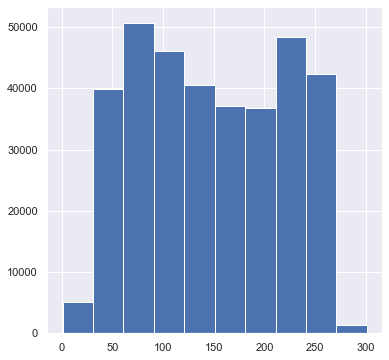

In [11]:
#sentence length distribution
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Text'].str.len()),min(df['Text'].str.len()),df['Text'].str.len().mean()))
df['Text'].str.len().hist()

### Word Count

In [12]:
#Review word count: Just to get a simple sensing of the word count in the reviews
word_count = []
for each in df["Text"]:
    words_list = each.split(" ")
    word_count.append(len(words_list))
df["word_count"] = word_count

In [13]:
df.head()

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people...",43
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost...",21
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa...",45
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin...",38
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma...",40


In [14]:
df["word_count"].describe()

count    348335.000000
mean         23.981753
std          11.556416
min           1.000000
25%          14.000000
50%          23.000000
75%          34.000000
max          88.000000
Name: word_count, dtype: float64

<AxesSubplot:>

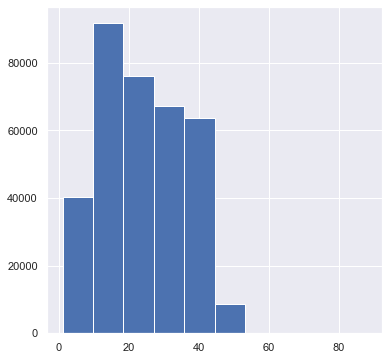

In [15]:
#word length distribution
df['word_count'].hist()

### Word Clouds

#### Text before preprocessing

In [42]:
stopwords = set(STOPWORDS)
stopwords.update(["covid", "nineteen", "vaccine", "vaccinated", "america", "usa", "country", "people", "today", "need", "vaccination", 
                  "covidvaccine", "vaccinate", "dose", "go", "want", "fully", "thank", "getting", "first", "second", "take", "american", "already", "shot",
                 "available", "going", "person", "said", "even", "make", "give", "know", "time", "still", "unvaccinate", "pfizer", "covaxin", 
                 "unvaccinated", "moderna", "janssen", "anti-vaccination", "anti-vaccine", "antivaxxer", "effective-vaccine", "immunocompromised", 
                  "mandated-vaccine", "never-vaccine", "trust-vaccine", "vaccinesaveslives", "covid vaccine", "covid vaccination", "astrazeneca", "covaxin", 
                  "covishield", "covovax", "sputnik", "gamaleya", "vaxx", "though", "three", "really", "year", "thing", "come", "anti", "think", "india", "indian"])

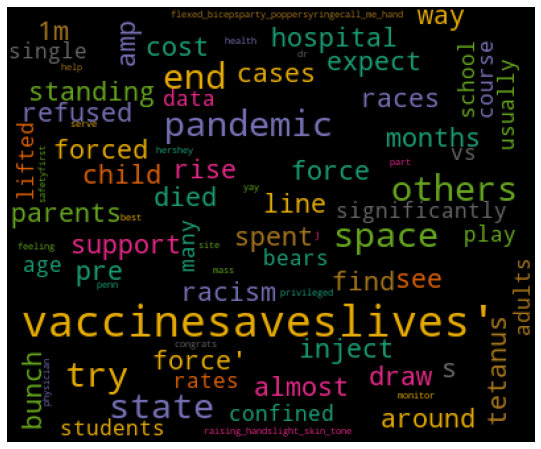

In [75]:
#overall wordcloud of text without preprocessing 

text = df['new_text'].values 
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### All processed words

In [18]:
def convert(a_series):
    consolidated_list = []
    str1 = " "
    for each in a_series:
        words_list = ast.literal_eval(each)
        for word in words_list:
            consolidated_list.append(word)
    return (str1.join(consolidated_list))

In [19]:
tweets_string = convert(df["words_processed_all"])


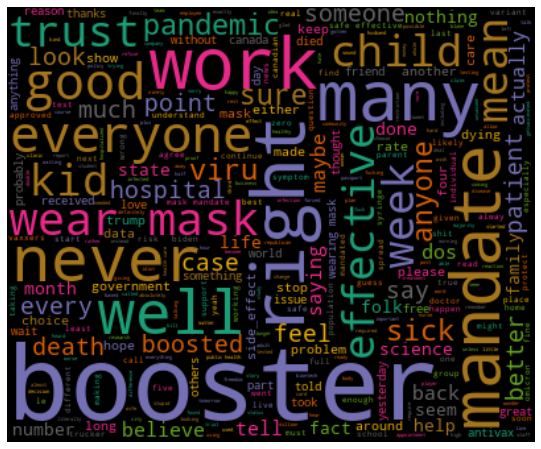

In [44]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### NOUN, ADJ, VERB, ADVERB

In [37]:
tweets_string_nounadj = convert(df["words_processed_noun_adj_verb_adv"])


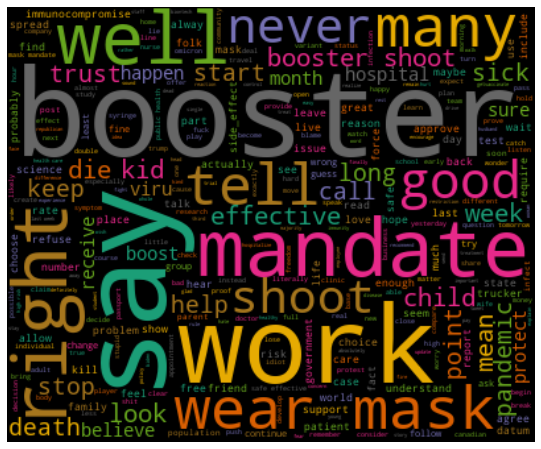

In [45]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string_nounadj)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**NOUN**

In [47]:
tweets_string_noun = convert(df["words_processed_noun"])

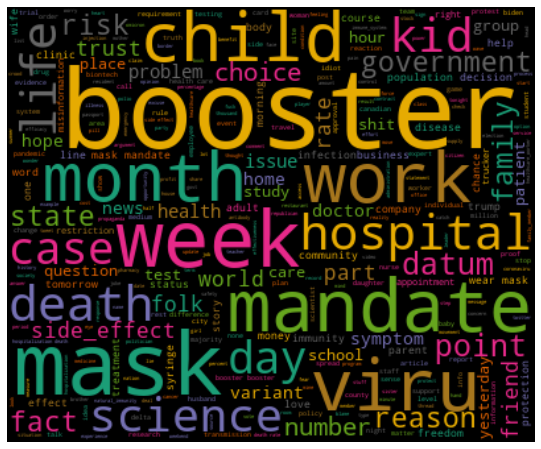

In [48]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string_noun)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Count

#### words_processed_all

In [25]:
words_list_all = [ast.literal_eval(each) for each in df["words_processed_all"]]

In [26]:
# List of all words across tweets
all_words = list(itertools.chain(*words_list_all))
all_words_count = collections.Counter(all_words)

In [27]:
all_words_count.most_common(15)

[('vaccine', 125325),
 ('vaccinated', 96592),
 ('unvaccinated', 68179),
 ('covid', 67435),
 ('pfizer', 66102),
 ('people', 63409),
 ('shot', 50037),
 ('moderna', 40645),
 ('booster', 34675),
 ('mask', 28669),
 ('like', 27106),
 ('vaccination', 26510),
 ('anti', 26315),
 ('still', 20632),
 ('getting', 19982)]

#### words_processed_noun_adj_verb_adv

In [28]:
words_list_noun_adj_verb_adv = [ast.literal_eval(each) for each in df["words_processed_noun_adj_verb_adv"]]

In [29]:
# List of all words across tweets
noun_adj_verb_adv_words = list(itertools.chain(*words_list_noun_adj_verb_adv))
noun_adj_verb_adv_words_count = collections.Counter(noun_adj_verb_adv_words)

In [30]:
noun_adj_verb_adv_words_count.most_common(15)

[('vaccine', 122394),
 ('covid', 63940),
 ('pfizer', 63536),
 ('people', 63374),
 ('vaccinate', 51006),
 ('unvaccinated', 48676),
 ('vaccinated', 47337),
 ('booster', 34620),
 ('mask', 28330),
 ('vaccination', 26281),
 ('get', 24891),
 ('shoot', 24456),
 ('shot', 23085),
 ('anti', 22941),
 ('take', 22617)]

#### words_processed_noun

In [31]:
words_list_noun = [ast.literal_eval(each) for each in df["words_processed_noun"]]

In [32]:
# List of all words across tweets
noun_words = list(itertools.chain(*words_list_noun))
noun_words_count = collections.Counter(noun_words)


In [33]:
noun_words_count.most_common(15)

[('vaccine', 116911),
 ('people', 63351),
 ('pfizer', 63009),
 ('booster', 34459),
 ('vaccination', 25854),
 ('mask', 24633),
 ('shot', 21718),
 ('dose', 19545),
 ('time', 16783),
 ('year', 14923),
 ('today', 13322),
 ('moderna', 13042),
 ('mandate', 12794),
 ('death', 12248),
 ('week', 11865)]

# Sentiment Analysis 

## TextBlob

### Polarity

In [6]:
from textblob import TextBlob
df['polarity']=df['words_processed_all'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [7]:
print("3 Random Tweets with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['Text']):
    print('Tweets {}:\n'.format(index+1),review)

3 Random Tweets with Highest Polarity:
Tweets 1:
 quit 2 years ago after smoking 40 years. best decision ever.
Tweets 2:
 got drafted by best 😤 pfizer gang
Tweets 3:
 oh.. you’re type that still thinks vaccines prevent infection that government big pharma have our best interests mind. gotcha.


In [8]:
print("3 Random Tweets with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:10].index]['Text']):
    print('Tweet {}:\n'.format(index+1),review)

3 Random Tweets with Lowest Polarity:
Tweet 1:
 2nd shot was awful. booster was nothing. get your shot.
Tweet 2:
 course they are but too bad our unvaccinated nurses, dr’s emt’s who worked through worst.
Tweet 3:
 three worst presidents. it’s trumps vaccine. it would have never happened three years if any them would have backed it.
Tweet 4:
 this is as bad as q anon magas always saying dinner sort overarching evil plot. reality, it's common sense because statistics show that vaccine works now unvaccinated are dying while vaccinated aren't.
Tweet 5:
 no vaccine anti aces practicing cdc. its sad cdc ruined its own professions organization. cdc cant be trusted when it’s not practicing its own participation science based study.the fact cdc is charge students health &amp;well being &amp;failing protect students is devastating.
Tweet 6:
 this has be worst generation ever. between anti vaccine people lazy workers. wicked needs be destroyed.
Tweet 7:
 yes, please officer, update us all this ho

In [9]:
sentiment_polarity = []
for each in df["polarity"]:
    if each == 0:
        sentiment_polarity.append("neutral")
    elif each > 0:
        sentiment_polarity.append("positive")
    else:
        sentiment_polarity.append("negative")

In [10]:
df["sentiment_polarity"] = sentiment_polarity

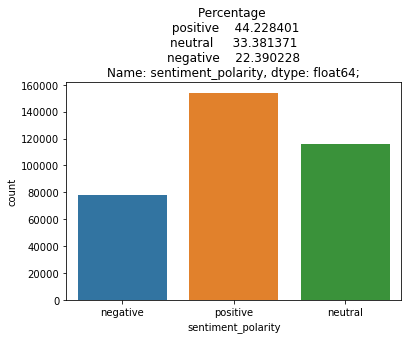

In [11]:
sns.countplot(x="sentiment_polarity", data=df)
normalise_count = df['sentiment_polarity'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

### Subjectivity

In [12]:
df['subjectivity']=df['words_processed_all'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [13]:
text_type = []
for each in df["subjectivity"]:
    if each >= 0.5:
        text_type.append("opinion-based")
    else:
        text_type.append("fact-based")
df["text_type"] = text_type

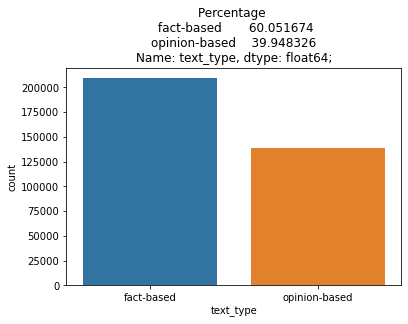

In [14]:
sns.countplot(x="text_type", data=df)
normalise_count = df['text_type'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

### VADER Sentiment

In [15]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/janviaswani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
#Test
sid.polarity_scores("This is an excellent car with great mileage")

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8316}

In [19]:
df['scores'] = df['new_text'].apply(lambda tweet: sid.polarity_scores(tweet))
df

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,polarity,sentiment_polarity,subjectivity,text_type,scores
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people...",-0.300000,negative,0.200000,fact-based,"{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost...",-0.100000,negative,0.100000,fact-based,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa...",0.130714,positive,0.427857,fact-based,"{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin...",0.000000,neutral,0.000000,fact-based,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma...",0.166667,positive,0.633333,opinion-based,"{'neg': 0.156, 'neu': 0.747, 'pos': 0.097, 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...
348330,oh that explains similar - seemingly out nowhe...,oh that explains similar - seemingly out nowhe...,ENGLISH,"[('that', 'DT'), ('explains', 'VBZ'), ('simila...","['explains', 'similar', 'seemingly', 'nowhere'...","['explain', 'similar', 'seemingly', 'nowhere',...","['message', 'screenshot', 'background', 'folk'...",-0.108333,negative,0.404167,fact-based,"{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'comp..."
348331,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"[('eligible', 'JJ'), ('please', 'NN'), ('regis...","['eligible', 'please', 'register', 'covid', 'n...","['eligible', 'register', 'covid', 'vaccination...","['vaccination', 'appointment', 'vaccinesavesli...",0.000000,neutral,0.000000,fact-based,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp..."
348332,do it others.... 💪🎉💉🤙 #vaccinesaveslives,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,"[('others', 'NNS'), ('vaccinesaveslives', 'NNS')]","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']",0.000000,neutral,0.000000,fact-based,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
348333,yay 🙌🏻 congrats dr. j being fully vaccinated i...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,"[('congrats', 'NNS'), ('being', 'VBG'), ('full...","['congrats', 'fully', 'vaccinated', 'best', 'f...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'vaccinesaveslive']",1.000000,positive,0.300000,fact-based,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp..."


In [20]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df

,Text,new_text,languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,polarity,sentiment_polarity,subjectivity,text_type,scores,compound
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,"[('want', 'JJ'), ('find', 'VBP'), ('racism', '...","['want', 'find', 'racism', 'force', 'people', ...","['want', 'find', 'racism', 'force', 'people', ...","['racism', 'force', 'people', 'bunch', 'people...",-0.300000,negative,0.200000,fact-based,"{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co...",-0.6249
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanu', 'spend', ...","['child', 'tetanu', 'month', 'hospital', 'cost...",-0.100000,negative,0.100000,fact-based,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.6712
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"[('would', 'MD'), ('expect', 'VB'), ('cases', ...","['would', 'expect', 'case', 'rise', 'significa...","['expect', 'case', 'rise', 'significantly', 'c...","['case', 'course', 'vaccination', 'rate', 'spa...",0.130714,positive,0.427857,fact-based,"{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...",0.3400
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'code', 'lin...",0.000000,neutral,0.000000,fact-based,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,it could have ripped… harder or do you think m...,it could have ripped… harder or do you think m...,ENGLISH,"[('could', 'MD'), ('have', 'VB'), ('ripped', '...","['could', 'ripped', 'harder', 'think', 'maskin...","['rip', 'hard', 'think', 'mask', 'isolation', ...","['isolation', 'question', 'look', 'spike', 'ma...",0.166667,positive,0.633333,opinion-based,"{'neg': 0.156, 'neu': 0.747, 'pos': 0.097, 'co...",-0.4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348330,oh that explains similar - seemingly out nowhe...,oh that explains similar - seemingly out nowhe...,ENGLISH,"[('that', 'DT'), ('explains', 'VBZ'), ('simila...","['explains', 'similar', 'seemingly', 'nowhere'...","['explain', 'similar', 'seemingly', 'nowhere',...","['message', 'screenshot', 'background', 'folk'...",-0.108333,negative,0.404167,fact-based,"{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'comp...",-0.1779
348331,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"[('eligible', 'JJ'), ('please', 'NN'), ('regis...","['eligible', 'please', 'register', 'covid', 'n...","['eligible', 'register', 'covid', 'vaccination...","['vaccination', 'appointment', 'vaccinesavesli...",0.000000,neutral,0.000000,fact-based,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.3182
348332,do it others.... 💪🎉💉🤙 #vaccinesaveslives,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,"[('others', 'NNS'), ('vaccinesaveslives', 'NNS')]","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']",0.000000,neutral,0.000000,fact-based,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
348333,yay 🙌🏻 congrats dr. j being fully vaccinated i...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,"[('congrats', 'NNS'), ('being', 'VBG'), ('full...","['congrats', 'fully', 'vaccinated', 'best', 'f...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'vaccinesaveslive']",1.000000,positive,0.300000,fact-based,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.9147


In [21]:
df["compound"].value_counts()

 0.0000    63273
-0.2960     5741
 0.3612     5711
 0.4404     4856
 0.4019     3884
           ...  
-0.8613        1
-0.4502        1
 0.5934        1
-0.2614        1
 0.8650        1
Name: compound, Length: 15239, dtype: int64

In [22]:
sentiment_vader = []
for each in df["compound"]:
    if each == 0:
        sentiment_vader.append("neutral")
    elif each > 0:
        sentiment_vader.append("positive")
    else:
        sentiment_vader.append("negative")

In [23]:
df["sentiment_vader"] = sentiment_vader

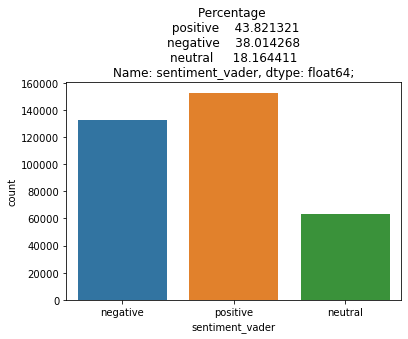

In [24]:
sns.countplot(x="sentiment_vader", data=df)
normalise_count = df['sentiment_vader'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

In [26]:
pos = df[df["sentiment_vader"] == "positive"]
neg = df[df["sentiment_vader"] == "negative"]
neu = df[df["sentiment_vader"] == "neutral"]

In [27]:
for each in pos.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: us truckers need shut down international bridges southern border going after ghe illegal immigration vaccine mandates that would be awesome
 
Tweet: wallet card i was given by doctor's clinic is flu card which was crossed out covid written instead. but it does indicate 2 doses pfizer lol.
 
Tweet: ... which doesn't answer your question. i'd tell your brooklyn's "friend" maybe not seek out moderna booster regardless original 2 shot sequence, but that's twitter swag rather than me having phd behind my name...
 


In [28]:
for each in neu.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: even within his own health department, romero added, there are still employees "that are not believers vaccine." how f are we supposed get people vaccinated if some employees health dept are anti-vaxxers
 
Tweet: #covidisairborne. #deltavariant is so infectious that it transmits crowded outdoor conditions. vaccinated people can contract covid &amp; pass it others. unvaccinated people really need n95 masks indoors &amp; probably crowded outdoor settings . 1/ #ksleg #ksed
 
Tweet: got #boostershot #vaccine #3rd_dose #modena today #losangeles #california #saturday
 


In [29]:
for each in neg.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: all vaccinated, masking social distancing. do you realize, because your compliance, this will never end. vaccine is intended depopulate enslave humanity. wake up
 
Tweet: i don’t understand your hostility. my question was did they have position it would seem strange that teachers union broward would be anti vax. i’ll take it you don’t know because it was never asked.
 
Tweet: my case, cdc screwed up. should have listened pfizer sooner. my second shot was april. israel recommended boosters after 6 mo. we were trending 8. i got covid after 7 months. was about go my booster independently…
 
